Sample of the dataset:
   CustomerID  Gender  Age  AnnualIncome  SpendingScore
0           1    Male   19            15             39
1           2    Male   21            15             81
2           3  Female   20            16              6
3           4  Female   23            16             77
4           5  Female   31            17             40
Enter the number of clusters (K): 2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


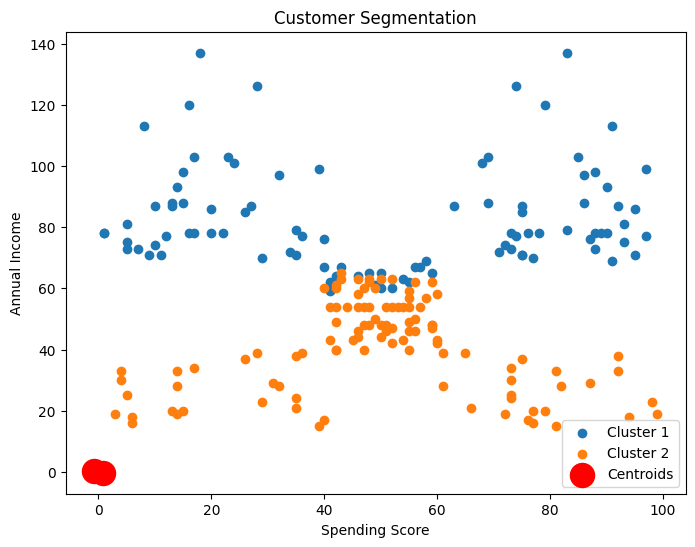

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
try:
    df = pd.read_csv('/content/Mall_Customers.csv')
except Exception as e:
    print(f"An error occurred while loading the dataset: {str(e)}")
    exit()

# Display the first few rows of the dataset to understand its structure
print("Sample of the dataset:")
print(df.head())

# Select only numeric features for clustering
numeric_columns = df.select_dtypes(include=['int64', 'float64'])
X = numeric_columns

# Standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Define the number of clusters (K)
k = int(input("Enter the number of clusters (K): "))

# Create a K-means model
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit the model to the data
kmeans.fit(X_std)

# Get cluster assignments for each data point
labels = kmeans.labels_

# Add the cluster assignments to the original dataframe
df['Cluster'] = labels

# Visualize the clusters (you may need to adjust this part based on your dataset)
plt.figure(figsize=(8, 6))
for cluster in range(k):
    cluster_data = df[df['Cluster'] == cluster]
    # Replace 'SpendingScore' and 'AnnualIncome' with appropriate column names
    plt.scatter(cluster_data['SpendingScore'], cluster_data['AnnualIncome'], label=f'Cluster {cluster + 1}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.xlabel('Spending Score')
plt.ylabel('Annual Income')
plt.title('Customer Segmentation')
plt.legend()
plt.show()

# You can now analyze and interpret the clusters as per your specific business needs.
